# EC OC Concentrations at powai 2023-2024

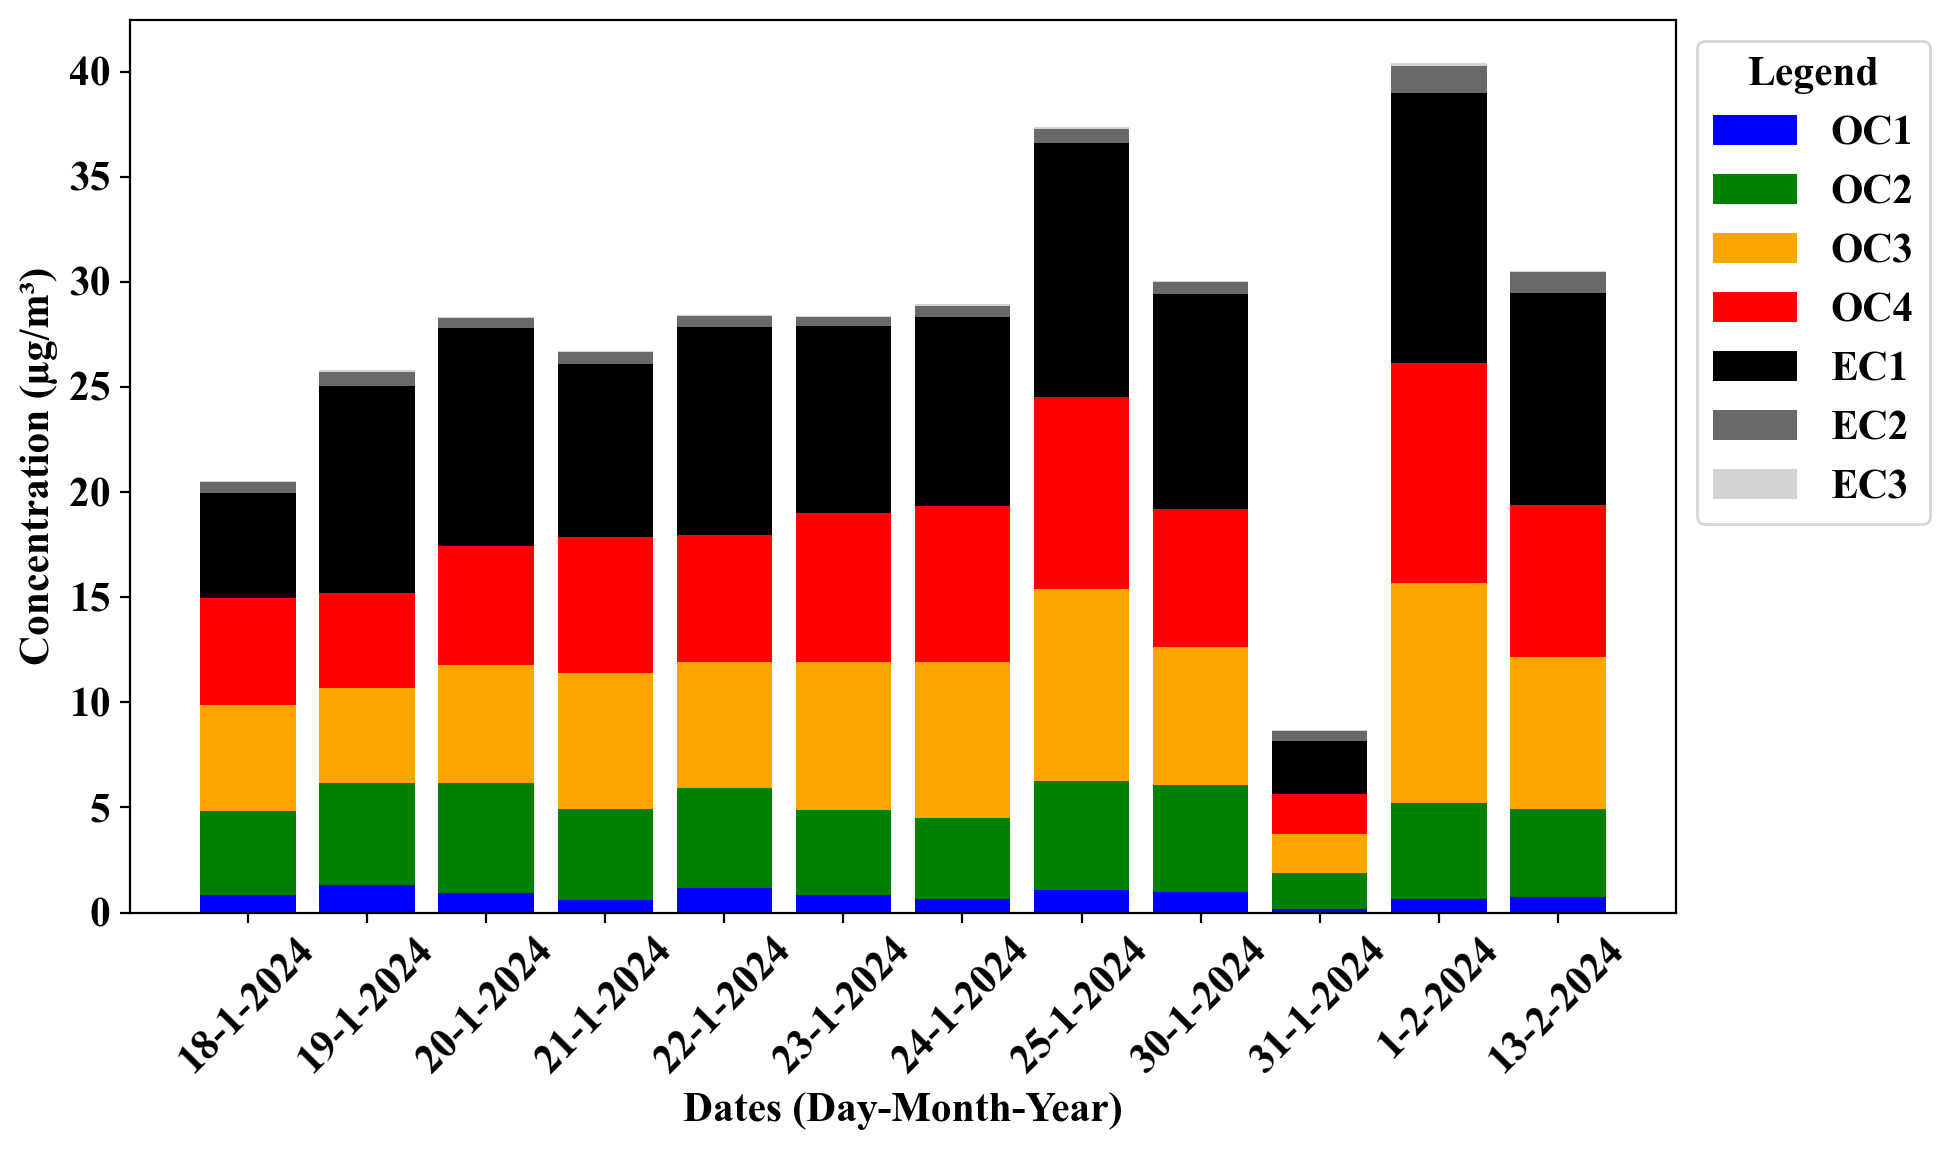

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15  # Set default font size

# OCPk Data (example values)
ocpk_data = np.array([
    [0.847680682, 3.987883227, 5.054133955, 5.054133955],
    [1.333647682, 4.820626193, 4.532028205, 4.532028205],
    [0.91245992, 5.254331966, 5.631298568, 5.631298568],
    [0.590673167, 4.328460955, 6.464513557, 6.464513557],
    [1.173846818, 4.734457739, 6.034816057, 6.034816057],
    [0.833104432, 4.032095761, 7.067160341, 7.067160341],
    [0.666525416, 3.842410057, 7.411642841, 7.411642841],
    [1.065759886, 5.184559636, 9.127665, 9.127665],
    [0.971281636, 5.080226932, 6.573744477, 6.573744477],
    [0.161342151, 1.712653705, 1.872977557, 1.872977557],
    [0.630714338, 4.601221875, 10.44906205, 10.44906205],
    [0.735225188, 4.190592682, 7.233000273, 7.233000273],
])

# ECPk Data (example values)
ecpk_data = np.array([
    [4.994365057, 0.550111282, 4.66E-02],
    [9.835510909, 0.639741733, 1.08E-01],
    [10.36751659, 0.497589344, 3.35E-02],
    [8.240693523, 0.590554142, 4.27E-02],
    [9.884947841, 0.529511881, 5.02E-02],
    [8.911491136, 0.433426088, 4.35E-02],
    [8.9998425, 0.519874855, 7.74E-02],
    [12.07772864, 0.682041791, 9.00E-02],
    [10.24440648, 0.528620448, 5.30E-02],
    [2.562569045, 0.470633789, 1.96E-02],
    [12.86438352, 1.279185511, 1.58E-01],
    [10.07609352, 0.991502557, 7.75E-02],
])

# Combine OCPk and ECPk data
combined_data_m3 = np.hstack((ocpk_data, ecpk_data))

# Dates for the x-axis (day-month-year)
dates = [
    "18-1-2024",
    "19-1-2024",
    "20-1-2024",
    "21-1-2024",
    "22-1-2024",
    "23-1-2024",
    "24-1-2024",
    "25-1-2024",
    "30-1-2024",
    "31-1-2024",
    "1-2-2024",
    "13-2-2024",
]

# Convert strings to datetime objects
date_objects = [datetime.strptime(date, "%d-%m-%Y") for date in dates]

# Define the number of bars
num_samples = combined_data_m3.shape[0]
num_bars = combined_data_m3.shape[1]

# Set the positions of the bars on the x-axis
bar_positions = np.arange(num_samples)

# Create a stacked bar plot
plt.figure(figsize=(10, 6), dpi=200)

# Bottom starts at 0 for the first bar
bottom_values = np.zeros(num_samples)

# Define colors: OCPk in color, ECPk in shades of black and gray
colors = ['blue', 'green', 'orange', 'red'] + ['black', 'dimgray', 'lightgray']

# Loop through each column to create the stacked bars
for i in range(num_bars):
    plt.bar(bar_positions, combined_data_m3[:, i], bottom=bottom_values,
            label=f'{"OC" if i < ocpk_data.shape[1] else "EC"}{(i % ocpk_data.shape[1]) + 1}',
            color=colors[i])
    bottom_values += combined_data_m3[:, i]  # Update bottom for next bar

# Format x-axis with day-month-year
plt.xticks(bar_positions, [f"{date.day}-{date.month}-{date.year}" for date in date_objects], rotation=45)

# Add titles and labels
plt.xlabel('Dates (Day-Month-Year)', weight='bold')
plt.ylabel('Concentration (µg/m³)', weight='bold')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legend")

# Show the plot
plt.tight_layout()
plt.show()


# Percentage Contribution plots

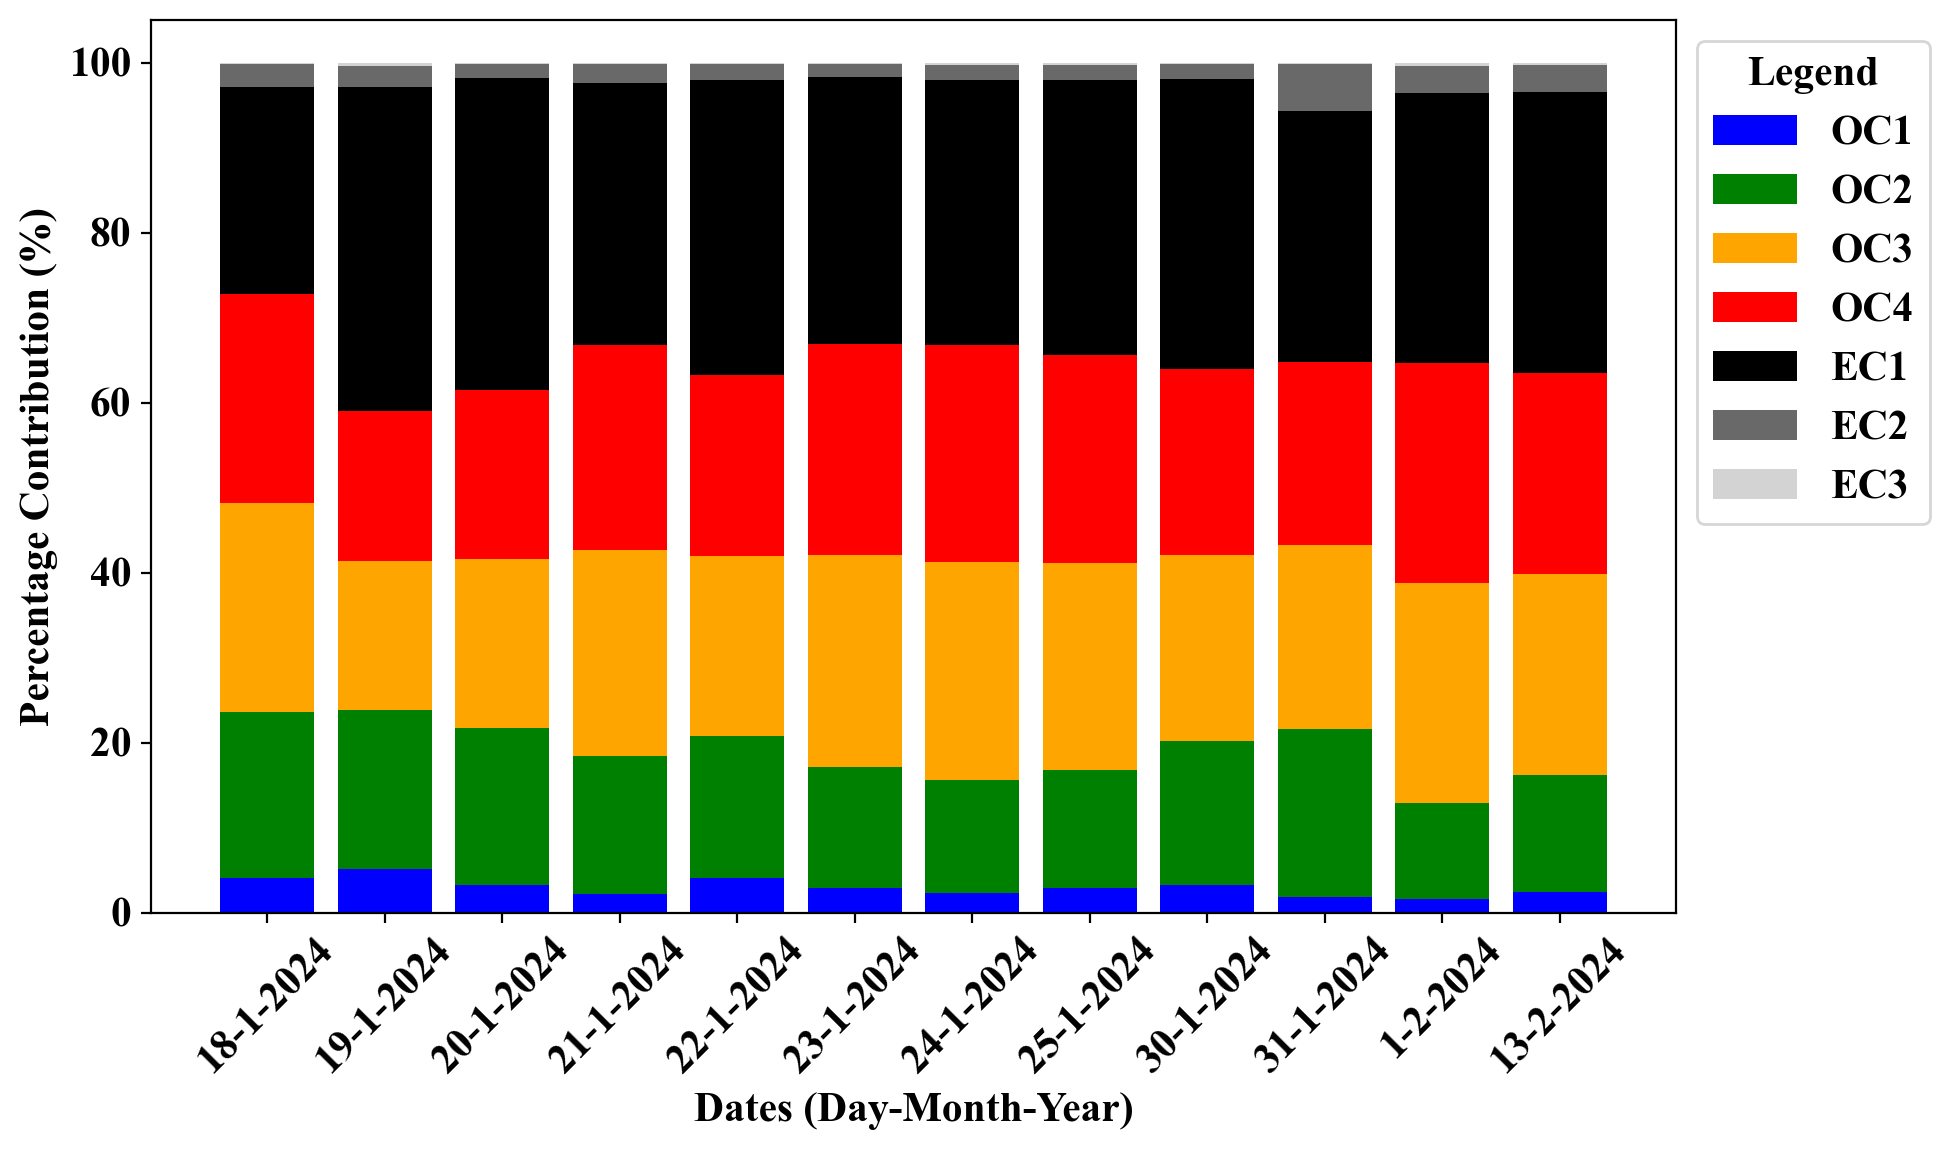

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15  # Set default font size

# OCPk Data (example values)
ocpk_data = np.array([
    [0.847680682, 3.987883227, 5.054133955, 5.054133955],
    [1.333647682, 4.820626193, 4.532028205, 4.532028205],
    [0.91245992, 5.254331966, 5.631298568, 5.631298568],
    [0.590673167, 4.328460955, 6.464513557, 6.464513557],
    [1.173846818, 4.734457739, 6.034816057, 6.034816057],
    [0.833104432, 4.032095761, 7.067160341, 7.067160341],
    [0.666525416, 3.842410057, 7.411642841, 7.411642841],
    [1.065759886, 5.184559636, 9.127665, 9.127665],
    [0.971281636, 5.080226932, 6.573744477, 6.573744477],
    [0.161342151, 1.712653705, 1.872977557, 1.872977557],
    [0.630714338, 4.601221875, 10.44906205, 10.44906205],
    [0.735225188, 4.190592682, 7.233000273, 7.233000273],
])

# ECPk Data (example values)
ecpk_data = np.array([
    [4.994365057, 0.550111282, 4.66E-02],
    [9.835510909, 0.639741733, 1.08E-01],
    [10.36751659, 0.497589344, 3.35E-02],
    [8.240693523, 0.590554142, 4.27E-02],
    [9.884947841, 0.529511881, 5.02E-02],
    [8.911491136, 0.433426088, 4.35E-02],
    [8.9998425, 0.519874855, 7.74E-02],
    [12.07772864, 0.682041791, 9.00E-02],
    [10.24440648, 0.528620448, 5.30E-02],
    [2.562569045, 0.470633789, 1.96E-02],
    [12.86438352, 1.279185511, 1.58E-01],
    [10.07609352, 0.991502557, 7.75E-02],
])

# Combine OCPk and ECPk data
combined_data_m3 = np.hstack((ocpk_data, ecpk_data))

# Calculate the total for each sample for percentage calculation
total_data = np.sum(combined_data_m3, axis=1, keepdims=True)
percentage_data = (combined_data_m3 / total_data) * 100

# Dates for the x-axis (day-month-year)
dates = [
    "18-1-2024",
    "19-1-2024",
    "20-1-2024",
    "21-1-2024",
    "22-1-2024",
    "23-1-2024",
    "24-1-2024",
    "25-1-2024",
    "30-1-2024",
    "31-1-2024",
    "1-2-2024",
    "13-2-2024",
]

# Convert strings to datetime objects
date_objects = [datetime.strptime(date, "%d-%m-%Y") for date in dates]

# Define the number of bars
num_samples = percentage_data.shape[0]
num_bars = percentage_data.shape[1]

# Set the positions of the bars on the x-axis
bar_positions = np.arange(num_samples)

# Create a stacked bar plot for percentage contribution
plt.figure(figsize=(10, 6), dpi=200)

# Bottom starts at 0 for the first bar
bottom_values = np.zeros(num_samples)

# Define colors: OCPk in color, ECPk in shades of black and gray
colors = ['blue', 'green', 'orange', 'red'] + ['black', 'dimgray', 'lightgray']

# Loop through each column to create the stacked bars
for i in range(num_bars):
    plt.bar(bar_positions, percentage_data[:, i], bottom=bottom_values,
            label=f'{"OC" if i < ocpk_data.shape[1] else "EC"}{(i % ocpk_data.shape[1]) + 1}',
            color=colors[i])
    bottom_values += percentage_data[:, i]  # Update bottom for next bar

# Format x-axis with day-month-year
plt.xticks(bar_positions, [f"{date.day}-{date.month}-{date.year}" for date in date_objects], rotation=45)

# Add titles and labels
plt.xlabel('Dates (Day-Month-Year)', weight='bold')
plt.ylabel('Percentage Contribution (%)', weight='bold')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legend")

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
import numpy as np

# Your data
ocpk_data = np.array([
    [0.847680682, 3.987883227, 5.054133955, 5.054133955],
    [1.333647682, 4.820626193, 4.532028205, 4.532028205],
    [0.91245992, 5.254331966, 5.631298568, 5.631298568],
    [0.590673167, 4.328460955, 6.464513557, 6.464513557],
    [1.173846818, 4.734457739, 6.034816057, 6.034816057],
    [0.833104432, 4.032095761, 7.067160341, 7.067160341],
    [0.666525416, 3.842410057, 7.411642841, 7.411642841],
    [1.065759886, 5.184559636, 9.127665, 9.127665],
    [0.971281636, 5.080226932, 6.573744477, 6.573744477],
    [0.161342151, 1.712653705, 1.872977557, 1.872977557],
    [0.630714338, 4.601221875, 10.44906205, 10.44906205],
    [0.735225188, 4.190592682, 7.233000273, 7.233000273],
])

ecpk_data = np.array([
    [4.994365057, 0.550111282, 4.66E-02],
    [9.835510909, 0.639741733, 1.08E-01],
    [10.36751659, 0.497589344, 3.35E-02],
    [8.240693523, 0.590554142, 4.27E-02],
    [9.884947841, 0.529511881, 5.02E-02],
    [8.911491136, 0.433426088, 4.35E-02],
    [8.9998425, 0.519874855, 7.74E-02],
    [12.07772864, 0.682041791, 9.00E-02],
    [10.24440648, 0.528620448, 5.30E-02],
    [2.562569045, 0.470633789, 1.96E-02],
    [12.86438352, 1.279185511, 1.58E-01],
    [10.07609352, 0.991502557, 7.75E-02],
])

# Calculate sums for each day
oc_sums = np.sum(ocpk_data, axis=1)
ec_sums = np.sum(ecpk_data, axis=1)

# Calculate OC/EC ratios for each day
oc_ec_ratios = oc_sums / ec_sums

# Output OC, EC, and OC/EC for each day
for day in range(len(oc_sums)):
    print(f"Day {day + 1}: OC = {oc_sums[day]:.4f}, EC = {ec_sums[day]:.4f}, OC/EC = {oc_ec_ratios[day]:.4f}")


Day 1: OC = 14.9438, EC = 5.5911, OC/EC = 2.6728
Day 2: OC = 15.2183, EC = 10.5833, OC/EC = 1.4380
Day 3: OC = 17.4294, EC = 10.8986, OC/EC = 1.5992
Day 4: OC = 17.8482, EC = 8.8739, OC/EC = 2.0113
Day 5: OC = 17.9779, EC = 10.4647, OC/EC = 1.7180
Day 6: OC = 18.9995, EC = 9.3884, OC/EC = 2.0237
Day 7: OC = 19.3322, EC = 9.5971, OC/EC = 2.0144
Day 8: OC = 24.5056, EC = 12.8498, OC/EC = 1.9071
Day 9: OC = 19.1990, EC = 10.8260, OC/EC = 1.7734
Day 10: OC = 5.6200, EC = 3.0528, OC/EC = 1.8409
Day 11: OC = 26.1301, EC = 14.3016, OC/EC = 1.8271
Day 12: OC = 19.3918, EC = 11.1451, OC/EC = 1.7399


In [26]:
import numpy as np

# Your data
ocpk_data = np.array([
    [0.847680682, 3.987883227, 5.054133955, 5.054133955],
    [1.333647682, 4.820626193, 4.532028205, 4.532028205],
    [0.91245992, 5.254331966, 5.631298568, 5.631298568],
    [0.590673167, 4.328460955, 6.464513557, 6.464513557],
    [1.173846818, 4.734457739, 6.034816057, 6.034816057],
    [0.833104432, 4.032095761, 7.067160341, 7.067160341],
    [0.666525416, 3.842410057, 7.411642841, 7.411642841],
    [1.065759886, 5.184559636, 9.127665, 9.127665],
    [0.971281636, 5.080226932, 6.573744477, 6.573744477],
    [0.161342151, 1.712653705, 1.872977557, 1.872977557],
    [0.630714338, 4.601221875, 10.44906205, 10.44906205],
    [0.735225188, 4.190592682, 7.233000273, 7.233000273],
])

ecpk_data = np.array([
    [4.994365057, 0.550111282, 4.66E-02],
    [9.835510909, 0.639741733, 1.08E-01],
    [10.36751659, 0.497589344, 3.35E-02],
    [8.240693523, 0.590554142, 4.27E-02],
    [9.884947841, 0.529511881, 5.02E-02],
    [8.911491136, 0.433426088, 4.35E-02],
    [8.9998425, 0.519874855, 7.74E-02],
    [12.07772864, 0.682041791, 9.00E-02],
    [10.24440648, 0.528620448, 5.30E-02],
    [2.562569045, 0.470633789, 1.96E-02],
    [12.86438352, 1.279185511, 1.58E-01],
    [10.07609352, 0.991502557, 7.75E-02],
])

# Calculate sums for each day
oc_sums = np.sum(ocpk_data, axis=1)
ec_sums = np.sum(ecpk_data, axis=1)

# Calculate OC/EC ratios for each day
oc_ec_ratios = oc_sums / ec_sums

# Calculate statistics
oc_max = np.max(oc_sums)
ec_max = np.max(ec_sums)
ratio_max = np.max(oc_ec_ratios)

oc_min = np.min(oc_sums)
ec_min = np.min(ec_sums)
ratio_min = np.min(oc_ec_ratios)

oc_mean = np.mean(oc_sums)
ec_mean = np.mean(ec_sums)
ratio_mean = np.mean(oc_ec_ratios)

oc_std = np.std(oc_sums)
ec_std = np.std(ec_sums)
ratio_std = np.std(oc_ec_ratios)

# Output the results
print(f"Max OC: {oc_max:.4f}, Max EC: {ec_max:.4f}, Max OC/EC: {ratio_max:.4f}")
print(f"Min OC: {oc_min:.4f}, Min EC: {ec_min:.4f}, Min OC/EC: {ratio_min:.4f}")
print(f"Mean OC: {oc_mean:.4f} ± {oc_std:.4f}, Mean EC: {ec_mean:.4f} ± {ec_std:.4f}, Mean OC/EC: {ratio_mean:.4f} ± {ratio_std:.4f}")


Max OC: 26.1301, Max EC: 14.3016, Max OC/EC: 2.6728
Min OC: 5.6200, Min EC: 3.0528, Min OC/EC: 1.4380
Mean OC: 18.0497 ± 4.8754, Mean EC: 9.7977 ± 2.8722, Mean OC/EC: 1.8805 ± 0.2917


C:\Users\Admin\AppData\Local\Temp\ipykernel_82180\555093495.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary_df.loc['OC/EC', 'Mean ± Std'] = f"{summary_df['Mean ± Std'][0].split(' ± ')[0]} + {summary_df['Mean ± Std'][1].split(' ± ')[0]}"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 15  # Set default font size

# OCPk Data (example values)
ocpk_data = np.array([
    [0.847680682, 3.987883227, 5.054133955, 5.054133955],
    [1.333647682, 4.820626193, 4.532028205, 4.532028205],
    [0.91245992, 5.254331966, 5.631298568, 5.631298568],
    [0.590673167, 4.328460955, 6.464513557, 6.464513557],
    [1.173846818, 4.734457739, 6.034816057, 6.034816057],
    [0.833104432, 4.032095761, 7.067160341, 7.067160341],
    [0.666525416, 3.842410057, 7.411642841, 7.411642841],
    [1.065759886, 5.184559636, 9.127665, 9.127665],
    [0.971281636, 5.080226932, 6.573744477, 6.573744477],
    [0.161342151, 1.712653705, 1.872977557, 1.872977557],
    [0.630714338, 4.601221875, 10.44906205, 10.44906205],
    [0.735225188, 4.190592682, 7.233000273, 7.233000273],
])


# ECPk Data (example values)
ecpk_data = np.array([
        [4.994365057, 0.550111282, 4.66E-02],
    [9.835510909, 0.639741733, 1.08E-01],
    [10.36751659, 0.497589344, 3.35E-02],
    [8.240693523, 0.590554142, 4.27E-02],
    [9.884947841, 0.529511881, 5.02E-02],
    [8.911491136, 0.433426088, 4.35E-02],
    [8.9998425, 0.519874855, 7.74E-02],
    [12.07772864, 0.682041791, 9.00E-02],
    [10.24440648, 0.528620448, 5.30E-02],
    [2.562569045, 0.470633789, 1.96E-02],
    [12.86438352, 1.279185511, 1.58E-01],
    [10.07609352, 0.991502557, 7.75E-02],

])

# Multiplication factor
factor = 3.675

# Convert to µg/m³
ocpk_data_m3 = ocpk_data * factor
ecpk_data_m3 = ecpk_data * factor

# Combine OCPk and ECPk data
combined_data_m3 = np.hstack((ocpk_data_m3, ecpk_data_m3))

# Dates for the x-axis
dates = [
    "18-Jan-24",
    "19-Jan-24",
    "20-Jan-24",
    "21-Jan-24",
    "22-Jan-24",
    "23-Jan-24",
    "24-Jan-24",
    "25-Jan-24",
    "30-Jan-24",
    "31-01-2024",
    "01-Feb-24",
    "13-Feb-24",
]


# Convert strings to datetime objects
date_objects = [datetime.strptime(date, "%d/%m/%Y") if date else None for date in dates]

# Define the number of bars
num_samples = combined_data_m3.shape[0]
num_bars = combined_data_m3.shape[1]

# Set the positions of the bars on the x-axis
bar_positions = np.arange(num_samples)

# Create a stacked bar plot
plt.figure(figsize=(10, 6), dpi=200)

# Bottom starts at 0 for the first bar
bottom_values = np.zeros(num_samples)

# Define colors: OCPk in color, ECPk in shades of black and gray
colors = ['blue', 'green', 'orange', 'red'] + ['black', 'dimgray', 'lightgray']

# Loop through each column to create the stacked bars
for i in range(num_bars):
    plt.bar(bar_positions, combined_data_m3[:, i], bottom=bottom_values,
            label=f'{"OC" if i < ocpk_data.shape[1] else "EC"}{(i % ocpk_data.shape[1]) + 1}',
            color=colors[i])
    bottom_values += combined_data_m3[:, i]  # Update bottom for next bar

# Format x-axis with dates
plt.xticks(bar_positions, [date.strftime('%d/%m/%Y') if date else '' for date in date_objects], rotation=45)

# Add titles and labels
plt.xlabel('Dates', weight='bold')
plt.ylabel('Concentration (µg/m³)', weight='bold')

# Move the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legend")

# Show the plot
plt.tight_layout()
plt.show()
